In [1]:
import os
from collections import defaultdict
import math

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:


vocabulary = defaultdict(list)
category_frequency = defaultdict(float)
total_documents = 0
test_df = defaultdict(list)



def classify():
    global total_documents

    for directory in os.listdir('dataset'):        
        ctr = 0
        if os.path.isdir(f'dataset/{directory}'):
        
            category = directory                        
            
            length = len(os.listdir(f'dataset/{category}'))
            
            
            for filename in os.listdir(f'dataset/{category}'):
                
                # Check if the file is a regular file (not a directory)
                if os.path.isfile(os.path.join(f'dataset/{category}', filename)):
                    
                    with open(os.path.join(f'dataset/{category}', filename), 'r') as file:
                        
                        words = file.read().split()
                        
                        if ctr < 0.8*(length):
                            for word in words:
                                vocabulary[category].append(word)
                        else:
                            test_df[category].append(words)

                        ctr += 1

                category_frequency[category] += 1
                total_documents += 1 

In [4]:
classify()

In [5]:
vocabulary

defaultdict(list,
            {'entertainment': ['Musicians',
              'to',
              'tackle',
              'US',
              'red',
              'tape',
              "Musicians'",
              'groups',
              'are',
              'to',
              'tackle',
              'US',
              'visa',
              'regulations',
              'which',
              'are',
              'blamed',
              'for',
              'hindering',
              'British',
              "acts'",
              'chances',
              'of',
              'succeeding',
              'across',
              'the',
              'Atlantic.',
              'A',
              'singer',
              'hoping',
              'to',
              'perform',
              'in',
              'the',
              'US',
              'can',
              'expect',
              'to',
              'pay',
              '$1,300',
              '(£680)',
              'simply',
   

In [6]:
from math import log
logiprior = defaultdict(float)
for category in category_frequency:
    logiprior[category] = log(category_frequency[category] / total_documents)

logiprior

defaultdict(float,
            {'entertainment': -1.7516748251355099,
             'business': -1.4731014688819692,
             'sport': -1.471142604396636,
             'politics': -1.6744259728015392,
             'tech': -1.7135507672937715})

In [7]:
word_count = defaultdict(int)
words_vocabulary = set()

for category in vocabulary:
    for word in vocabulary[category]:
        word_count[word] += 1
        words_vocabulary.add(word)

word_count

defaultdict(int,
            {'Musicians': 3,
             'to': 19835,
             'tackle': 59,
             'US': 1048,
             'red': 45,
             'tape': 10,
             "Musicians'": 4,
             'groups': 72,
             'are': 3428,
             'visa': 27,
             'regulations': 16,
             'which': 2013,
             'blamed': 38,
             'for': 6888,
             'hindering': 1,
             'British': 407,
             "acts'": 1,
             'chances': 45,
             'of': 15762,
             'succeeding': 4,
             'across': 180,
             'the': 35320,
             'Atlantic.': 4,
             'A': 776,
             'singer': 87,
             'hoping': 73,
             'perform': 35,
             'in': 13172,
             'can': 1211,
             'expect': 82,
             'pay': 210,
             '$1,300': 1,
             '(£680)': 1,
             'simply': 107,
             'obtaining': 3,
             'a': 13674,
            

In [8]:
from collections import Counter
loglikelihood = defaultdict(list)
laplase_smoothing = [0.1, 0.5, 1.0, 10, 100]

for laplase_factor in laplase_smoothing:
    for category in vocabulary:
        counter = Counter(vocabulary[category])
        for word in words_vocabulary:
            loglikelihood[(word, category)].append(log((counter[word] + laplase_factor) / (len(vocabulary[category]) + laplase_factor)))

loglikelihood



defaultdict(list,
            {('Retrieval', 'entertainment'): [-13.820548844456422,
              -12.211114911911938,
              -11.517972706191742,
              -9.215477156081334,
              -6.9137870512138555],
             ('anyway.', 'entertainment'): [-11.422653571658051,
              -11.112502623243829,
              -10.824825525631796,
              -9.12016697627701,
              -6.903836720360688],
             ('Palestinian-Israeli', 'entertainment'): [-13.820548844456422,
              -12.211114911911938,
              -11.517972706191742,
              -9.215477156081334,
              -6.9137870512138555],
             ('product."', 'entertainment'): [-13.820548844456422,
              -12.211114911911938,
              -11.517972706191742,
              -9.215477156081334,
              -6.9137870512138555],
             ('cultural', 'entertainment'): [-9.888723211732096,
              -9.81321963911357,
              -9.726213236963687,
              -8

In [9]:
def test(test_df, logiprior, loglikelihood, index, categories, words_vocabulary):
    ans = defaultdict(int)
    
    for category in categories:
        summ = logiprior[category]

        for word in test_df:
            if word in words_vocabulary:
                summ += loglikelihood[(word, category)][index]


        ans[category] = summ

    output = -float('inf')
    for category in ans:
        if ans[category] > output:
            best = category
            output = ans[category]
    
    return best





In [10]:
categories = []
for i in vocabulary:
    categories.append(i)

In [11]:
ctr = total = 0
accuracy = []
for index in range(5):
    for category in test_df:
        for doc in test_df[category]:
            
            output = test(doc, logiprior, loglikelihood, index,  categories, words_vocabulary)
            if output == category:
                ctr += 1
            total += 1

    accuracy.append(ctr / total)
    print(f'Laplase Factor: {laplase_smoothing[index]}, Accuracy: {ctr / total * 100}%')

Laplase Factor: 0.1, Accuracy: 97.74774774774775%
Laplase Factor: 0.5, Accuracy: 97.63513513513513%
Laplase Factor: 1.0, Accuracy: 97.44744744744744%
Laplase Factor: 10, Accuracy: 96.67792792792793%
Laplase Factor: 100, Accuracy: 81.66666666666667%


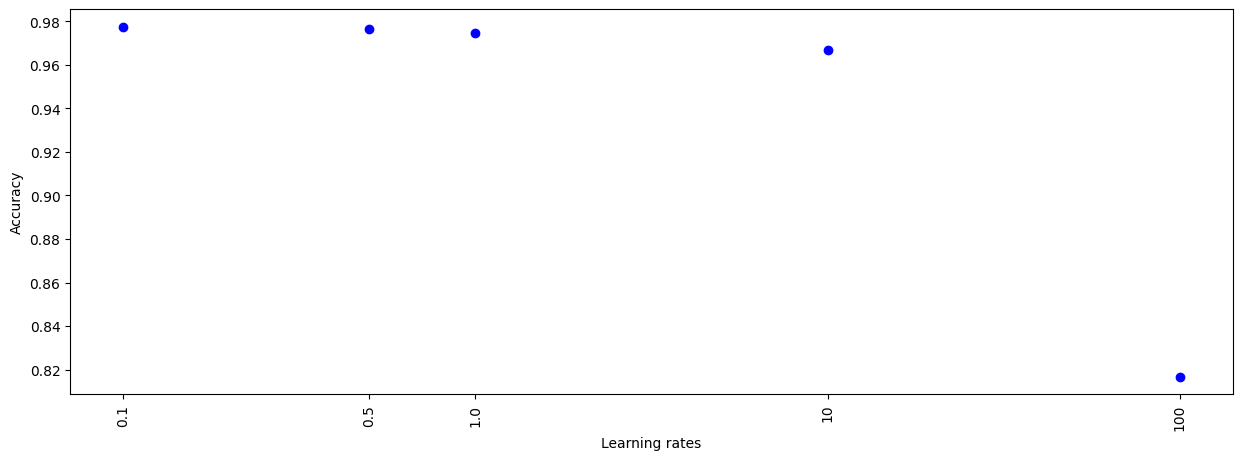

In [12]:
plt.rcParams["figure.figsize"] = (15,5)

plt.plot(list(map(math.log, laplase_smoothing)), accuracy, 'bo')
plt.xlabel('Learning rates')
plt.ylabel('Accuracy')
plt.xticks(list(map(math.log, laplase_smoothing)), labels=laplase_smoothing, rotation=90)

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]